Homework 1
This homework assignment will use the titanic_train data set found in the dataset folder. You will have a week to complete this assignment. Do all your analysis and answer the questions within a Jupyter notebook. Put the notebook in your GitHub's homework repository.

In [168]:
# 1.  Read the titanic data set into a pandas dataframe.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('https://raw.githubusercontent.com/galvin-mj/DAT_ATL_15/master/Datasets/titanic_train.csv')

In [169]:
# 2.  Look at the first 5 rows.

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [18]:
# 3.  What is the size of the data set? (rows and columns)


df.shape


(891, 12)

In [170]:
# 4.  How many people survived? What percentage of people survived?

survivedT = df['Survived']
survived = sum(survivedT)
print survived
print 100.0*survived/len(survivedT), '%'

342
38.3838383838 %


In [171]:
# 5.  What percentage of passengers are male? female?

sex = df['Sex'].tolist()
leng = len(sex)

sum_male = sex.count('male')
sum_female = sex.count('female')

print 'percentage of male passengers: ', 100.0*sum_male/leng, '%'
print 'percentage of female passengers: ', 100.0*sum_female/leng, '%'

percentage of male passengers:  64.758698092 %
percentage of female passengers:  35.241301908 %


In [142]:
# 6.  What is the survival rate of male passengers? female passengers?


surv_list = survivedT.tolist()
surv_sex = zip(surv_list, sex)

surv_male = surv_sex.count((1, 'male'))
surv_female = surv_sex.count((1, 'female'))


print 'survival rate of male passengers: ', 100.0*surv_male/sum_male, "%"
print 'survival rate of female passengers: ', 100.0*surv_female/sum_female, "%"






survival rate of male passengers:  18.8908145581 %
survival rate of female passengers:  74.2038216561 %


In [172]:
# 7.  How many different cabin classes, Pclass, are there?

pclass_list = df['Pclass'].tolist()
pclass_set =set(pclass_list)

print len(pclass_set), 'different classes'

3 different classes


In [173]:
# 8.  What percent of the passengers are in each class?

sum1 = pclass_list.count(1)
sum2 = pclass_list.count(2)
sum3 = pclass_list.count(3)

print 'percentage in class 1: ', 100.0*sum1/leng, '%'
print 'percentage in class 2: ', 100.0*sum2/leng, '%'
print 'percentage in class 3: ', 100.0*sum3/leng, '%'




percentage in class 1:  24.2424242424 %
percentage in class 2:  20.6509539843 %
percentage in class 3:  55.1066217733 %


In [174]:
# 9.  What is the survival rate within each class?


p_surv = zip(pclass_list, surv_list)

p1_surv1 = p_surv.count((1,1))
p2_surv1 = p_surv.count((2,1))
p3_surv1 = p_surv.count((3,1))

print 'survival rate of class 1', 100.0*p1_surv1/sum1, '%'
print 'survival rate of class 2', 100.0*p2_surv1/sum2, '%'
print 'survival rate of class 3', 100.0*p3_surv1/sum3, '%'




survival rate of class 1 62.962962963 %
survival rate of class 2 47.2826086957 %
survival rate of class 3 24.2362525458 %


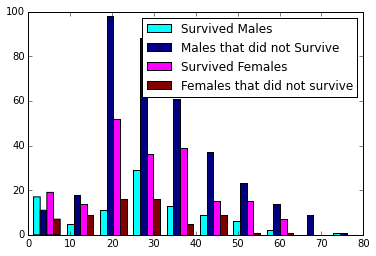

In [175]:
# 10.  Create a histogram of ages split by sex and survival.



dft = df[['Age', 'Survived', 'Sex']]
dft = dft[np.isfinite(dft['Age'])]

dft_male = dft.loc[dft['Sex'] == 'male']
dft_male1 = dft_male.loc[dft_male['Survived'] == 1]
dft_male0 = dft_male.loc[dft_male['Survived'] == 0]
dft_female = dft.loc[dft['Sex'] == 'female']
dft_female1 = dft_female.loc[dft_female['Survived'] == 1]
dft_female0 = dft_female.loc[dft_female['Survived'] == 0]

plt.hist((dft_male1['Age'], dft_male0['Age'], dft_female1['Age'], dft_female0['Age']), 
        color=['cyan', 'navy', 'magenta', 'maroon'],
        label = ['Survived Males', 'Males that did not Survive', 'Survived Females', 'Females that did not survive'])
plt.legend()


([<matplotlib.axis.XTick at 0x10c390990>,
 <a list of 6 Text xticklabel objects>)

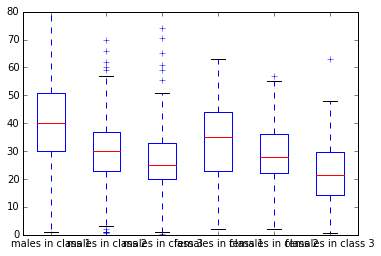

In [177]:
# 11.  Create a boxplot for age split by class and sex.

dftt = df[['Age', 'Pclass', 'Sex']]
dftt = dftt[np.isfinite(dftt['Age'])]

dfttM = dftt.loc[dftt['Sex'] =='male']
dfttF = dftt.loc[dftt['Sex'] =='female']

m1 = dfttM.loc[dfttM['Pclass'] == 1]
m2 = dfttM.loc[dfttM['Pclass'] == 2]
m3 = dfttM.loc[dfttM['Pclass'] == 3]
f1 = dfttF.loc[dfttF['Pclass'] == 1]
f2 = dfttF.loc[dfttF['Pclass'] == 2]
f3 = dfttF.loc[dfttF['Pclass'] == 3]

plt.boxplot((m1['Age'], m2['Age'], m3['Age'], f1['Age'], f2['Age'], f3['Age']))
plt.xticks([1,2,3,4,5,6], ['males in class 1', 'males in class 2', 'males in class 3', 
                           'females in class 1', 'females in class 2', 'females in class 3'])





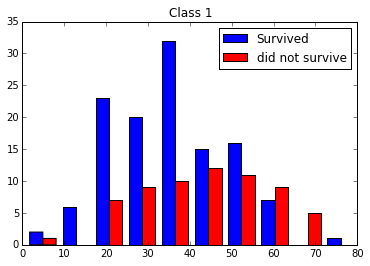

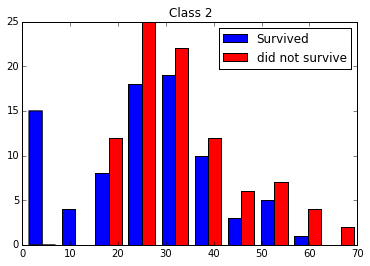

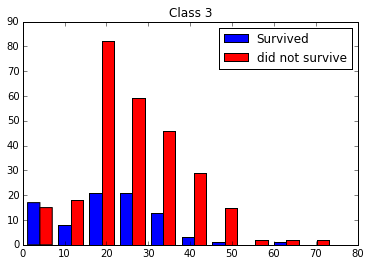

In [198]:
# 12.  For each class create a histogram plot of ages split by suvivor or not. 
# ( You will have one figure for each class. Each figure will have two histograms on it. 
# One for survivors and one for non-survivors where the survivors are colored blue and non-survivors colored red)


dff = df[['Pclass', 'Age', 'Survived']]
dff = dff[np.isfinite(dff['Age'])]

dff1 = dff.loc[dff['Pclass'] == 1]
dff2 = dff.loc[dff['Pclass'] == 2]
dff3 = dff.loc[dff['Pclass'] == 3]

p1s1 = dff1.loc[dff1['Survived'] == 1]
p1s0 = dff1.loc[dff1['Survived'] == 0]
p2s1 = dff2.loc[dff2['Survived'] == 1]
p2s0 = dff2.loc[dff2['Survived'] == 0]
p3s1 = dff3.loc[dff3['Survived'] == 1]
p3s0 = dff3.loc[dff3['Survived'] == 0]

plt.figure(1)
plt.title('Class 1')
plt.hist((p1s1['Age'], p1s0['Age']), color=['blue','red'], label = ['Survived', 'did not survive'])
plt.legend()

plt.figure(2)
plt.title('Class 2')
plt.hist((p2s1['Age'], p2s0['Age']), color=['blue','red'], label = ['Survived', 'did not survive'])
plt.legend()

plt.figure(3)
plt.title('Class 3')
plt.hist((p3s1['Age'], p3s0['Age']), color=['blue','red'], label = ['Survived', 'did not survive'])
plt.legend()

..13.  Discuss anything interesting you found. Where there any surprises? Are there any data issues you found? If you wanted to predict survival or not what do you think we be the most useful?


i thought it was interesting that the "women and children first" trope was true and visible through the data.  i wonder why some of the ages were not recorded.  or how some of the ages appear as non-integers.  is age determined by the person's bday?  i guess to predict survival, the most useful variables would but what class the person was in, and if they were women and children.  

